Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [2]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [3]:
print(gold_data)

           Date        Price         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]


In [4]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,Price,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,Price,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [7]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   Price    2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# checking the number of missing values
gold_data.isnull().sum()

,0
Date,0
Price,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [9]:
gold_data=gold_data.fillna(method='pad')

<ipython-input-9-b3fdda69b031>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gold_data=gold_data.fillna(method='pad')


In [10]:
# Hàm để loại bỏ dẫu phẩy và chuyển đổi sang float
def convert_to_float(value):
  if isinstance(value, str):
    # Loại bỏ ký tự phần trăm nếu có
    value = value.replace('%', "")
    # Loại bò dấu phẩy
    value = value.replace(',', "")
    # Loại bó K
    value = value.replace('K', "")
  return float (value)

# Áp dụng hàm cho tất cả các cột
for column in gold_data.columns[1:]:
  gold_data[column] = gold_data[column].apply(convert_to_float)

In [11]:
# getting the statistical measures of the data
gold_data.describe()

,Price,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Convert the 'Date' column to a datetime format:

In [12]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

Correlation:

Positive Correlation
Negative Correlation

In [13]:
numeric_gold_data = gold_data.select_dtypes(include=['float64', 'int64'])


correlation = numeric_gold_data.corr()

print(correlation)

            Price       GLD       USO       SLV   EUR/USD
Price    1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


<Axes: >

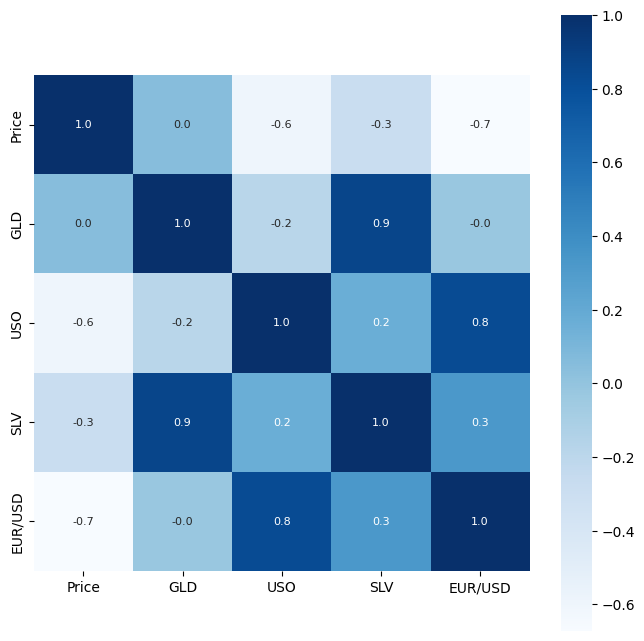

In [14]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
# correlation values of GLD
print(correlation['Price'])

Price      1.000000
GLD        0.049345
USO       -0.591573
SLV       -0.274055
EUR/USD   -0.672017
Name: Price, dtype: float64


<Axes: xlabel='Price', ylabel='Density'>

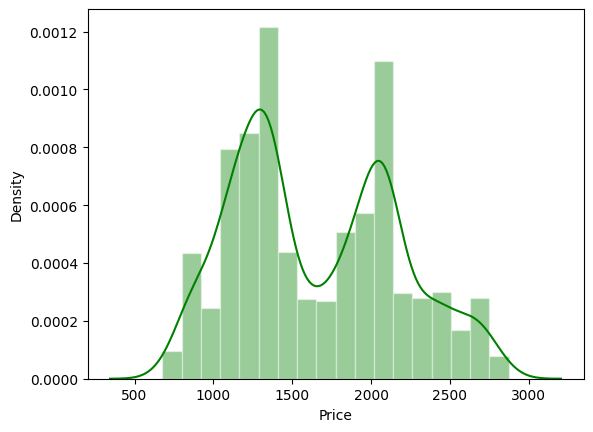

In [15]:
# checking the distribution of the GLD Price
sns.histplot(gold_data['Price'],color='green', kde=True, stat="density", kde_kws=dict(cut=3),alpha=.4, edgecolor=(1, 1, 1, .4))

Splitting the Features and Target

In [16]:
X = gold_data.drop(['Date','Price'],axis=1)
Y = gold_data['Price']

In [17]:
print(X)

             GLD        USO      SLV   EUR/USD
0      84.860001  78.470001  15.1800  1.471692
1      85.570000  78.370003  15.2850  1.474491
2      85.129997  77.309998  15.1670  1.475492
3      84.769997  75.500000  15.0530  1.468299
4      86.779999  76.059998  15.5900  1.557099
...          ...        ...      ...       ...
2285  124.589996  14.060000  15.5100  1.186789
2286  124.330002  14.370000  15.5300  1.184722
2287  125.180000  14.410000  15.7400  1.191753
2288  124.489998  14.380000  15.5600  1.193118
2289  122.543800  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [18]:
print(Y)

0       1447.160034
1       1447.160034
2       1411.630005
3       1416.180054
4       1390.189941
           ...     
2285    2671.919922
2286    2697.790039
2287    2723.070068
2288    2730.129883
2289    2725.780029
Name: Price, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training: Random Forest Regressor

In [20]:
regressor = RandomForestRegressor(n_estimators=100)

In [21]:
# training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

In [22]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [23]:
print(test_data_prediction)

[1336.43777839 1295.12642456 1905.4813768  2189.2015381  2355.46748289
 1366.22358514 1314.41370859 2475.88440898 1946.70191041 1977.24219838
 2063.94413688 1159.59122186 1588.36287454 1331.28589473 2072.05578622
 2347.09358509 1328.97199212 1456.31621709 1372.4015723  1263.43130121
 1561.20747216 1712.58578986 1139.34970714 1326.30982188 2727.66709964
  981.34049184 1188.26408868 1808.59129386 1889.40629767 1378.20871093
  859.03470282 2686.81681395 1294.06419914 1927.08037827 1062.2483812
 1241.61210435 2067.18855939 2094.14977402 1243.85780143 2090.17711429
 1085.12709905 1381.97031133 2678.44439452 1255.21238886 1308.54489375
 1783.65930055 2314.4245008  1953.84042615 1339.23451672 1966.33030623
  843.32959901 2102.41166733 2272.0574073  1994.07682382 2469.7786864
 1799.80299916 1482.23240612 1299.16430914 1331.03879876 1387.83029287
 1347.61950943 1389.2454138   782.57380381 2641.71685062 2682.54847662
 1427.2085081  1305.00821783 2532.55610855 1973.22792231 1043.94529425
 1252.59

In [24]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.962374638426081


Compare the Actual Values and Predicted Values in a Plot

In [25]:
Y_test = list(Y_test)

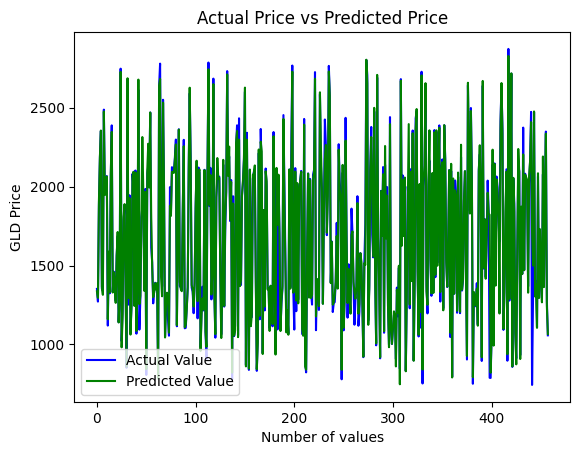

In [26]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()